In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
# load the dataset
credit_card_data = pd.read_csv('/content/drive/MyDrive/Credit-Card-Fraud-Detection Dataset/creditcard.csv')

In [7]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [12]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [13]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [14]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions


Number of Fraudulent Transactions --> 492


In [17]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [18]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [19]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
88197,62028.0,1.086171,0.019874,0.728661,1.379538,-0.412767,0.201857,-0.270280,0.222026,0.313571,...,0.028482,0.303831,-0.075633,0.245170,0.591767,-0.270956,0.047287,0.009980,9.99,0
135417,81245.0,-1.035296,0.098301,0.289791,-1.930680,1.401716,3.950375,-0.497838,1.535381,0.309835,...,-0.102600,-0.559475,0.107773,1.053452,-0.082043,0.792686,-0.109652,0.034601,91.27,0
111982,72463.0,-0.284726,1.100145,0.695527,-0.323670,0.963517,0.304769,0.653815,0.113173,-0.414376,...,-0.319865,-0.772245,-0.167820,-1.359362,-0.021771,0.185938,0.265200,0.082245,2.99,0
31331,36322.0,0.675236,-1.163990,0.970669,0.316812,-1.275747,0.366741,-0.524997,0.263713,0.894092,...,-0.003826,-0.261991,-0.077187,0.311230,-0.075241,0.918136,-0.062976,0.042142,234.01,0
68131,52847.0,1.132509,-0.289374,0.399986,0.588864,-0.402981,0.333768,-0.408500,0.282585,0.620187,...,-0.042042,0.013262,-0.103847,-0.268940,0.446326,0.579371,-0.024950,-0.007860,23.95,0


In [20]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [21]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [22]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91093.229675,-0.034352,0.108785,0.161974,0.088347,0.015361,0.072928,0.059278,-0.084036,0.038298,...,0.003894,0.053072,0.020925,0.049914,0.017451,0.006619,0.034293,0.010361,0.013689,81.578333
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [23]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [24]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
88197    62028.0  1.086171  0.019874  0.728661  1.379538 -0.412767  0.201857   
135417   81245.0 -1.035296  0.098301  0.289791 -1.930680  1.401716  3.950375   
111982   72463.0 -0.284726  1.100145  0.695527 -0.323670  0.963517  0.304769   
31331    36322.0  0.675236 -1.163990  0.970669  0.316812 -1.275747  0.366741   
68131    52847.0  1.132509 -0.289374  0.399986  0.588864 -0.402981  0.333768   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [25]:
print(Y)

88197     0
135417    0
111982    0
31331     0
68131     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (688, 30) (296, 30)


Model Training

Logistic Regression

In [28]:
model = LogisticRegression()

In [29]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [30]:
#training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [31]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9505813953488372


In [32]:
#test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [33]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9155405405405406


Model Training

Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Model Training: Random Forest
random_forest_model = RandomForestClassifier(n_estimators=10, random_state=42)

In [83]:
random_forest_model.fit(X_train, Y_train)

# Training data
RF_train_predictions = random_forest_model.predict(X_train)
RF_training_data_accuracy = accuracy_score(RF_train_predictions, Y_train)
print('Accuracy on Training data (Random Forest): ', RF_training_data_accuracy)

# Test data
RF_test_predictions = random_forest_model.predict(X_test)
RF_test_data_accuracy = accuracy_score(RF_test_predictions, Y_test)
print('Accuracy score on Test Data (Random Forest): ', RF_test_data_accuracy)

Accuracy on Training data (Random Forest):  0.9936467598475223
Accuracy score on Test Data (Random Forest):  0.9035532994923858


techniques like oversampling or undersampling for improving results

In [87]:
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

# Oversampling using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=2)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Model Training: Random Forest
random_forest_model = RandomForestClassifier(n_estimators=10, random_state=42)

# Training the Random Forest Model with Resampled Training Data (oversampled using SMOTE)
random_forest_model.fit(X_train_resampled, Y_train_resampled)

# Model Evaluation: Random Forest
# Training data
RF_train_predictions = random_forest_model.predict(X_train_resampled)
RF_training_data_report = classification_report(RF_train_predictions, Y_train_resampled)
print('Classification Report on Training data (Random Forest - Resampled): \n', RF_training_data_report)

# Test data
RF_test_predictions = random_forest_model.predict(X_test)
RF_test_data_report = classification_report(RF_test_predictions, Y_test)
print('Classification Report on Test Data (Random Forest): \n', RF_test_data_report)

Classification Report on Training data (Random Forest - Resampled): 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       351
           1       0.98      1.00      0.99       337

    accuracy                           0.99       688
   macro avg       0.99      0.99      0.99       688
weighted avg       0.99      0.99      0.99       688

Classification Report on Test Data (Random Forest): 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92       165
           1       0.86      0.97      0.91       131

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



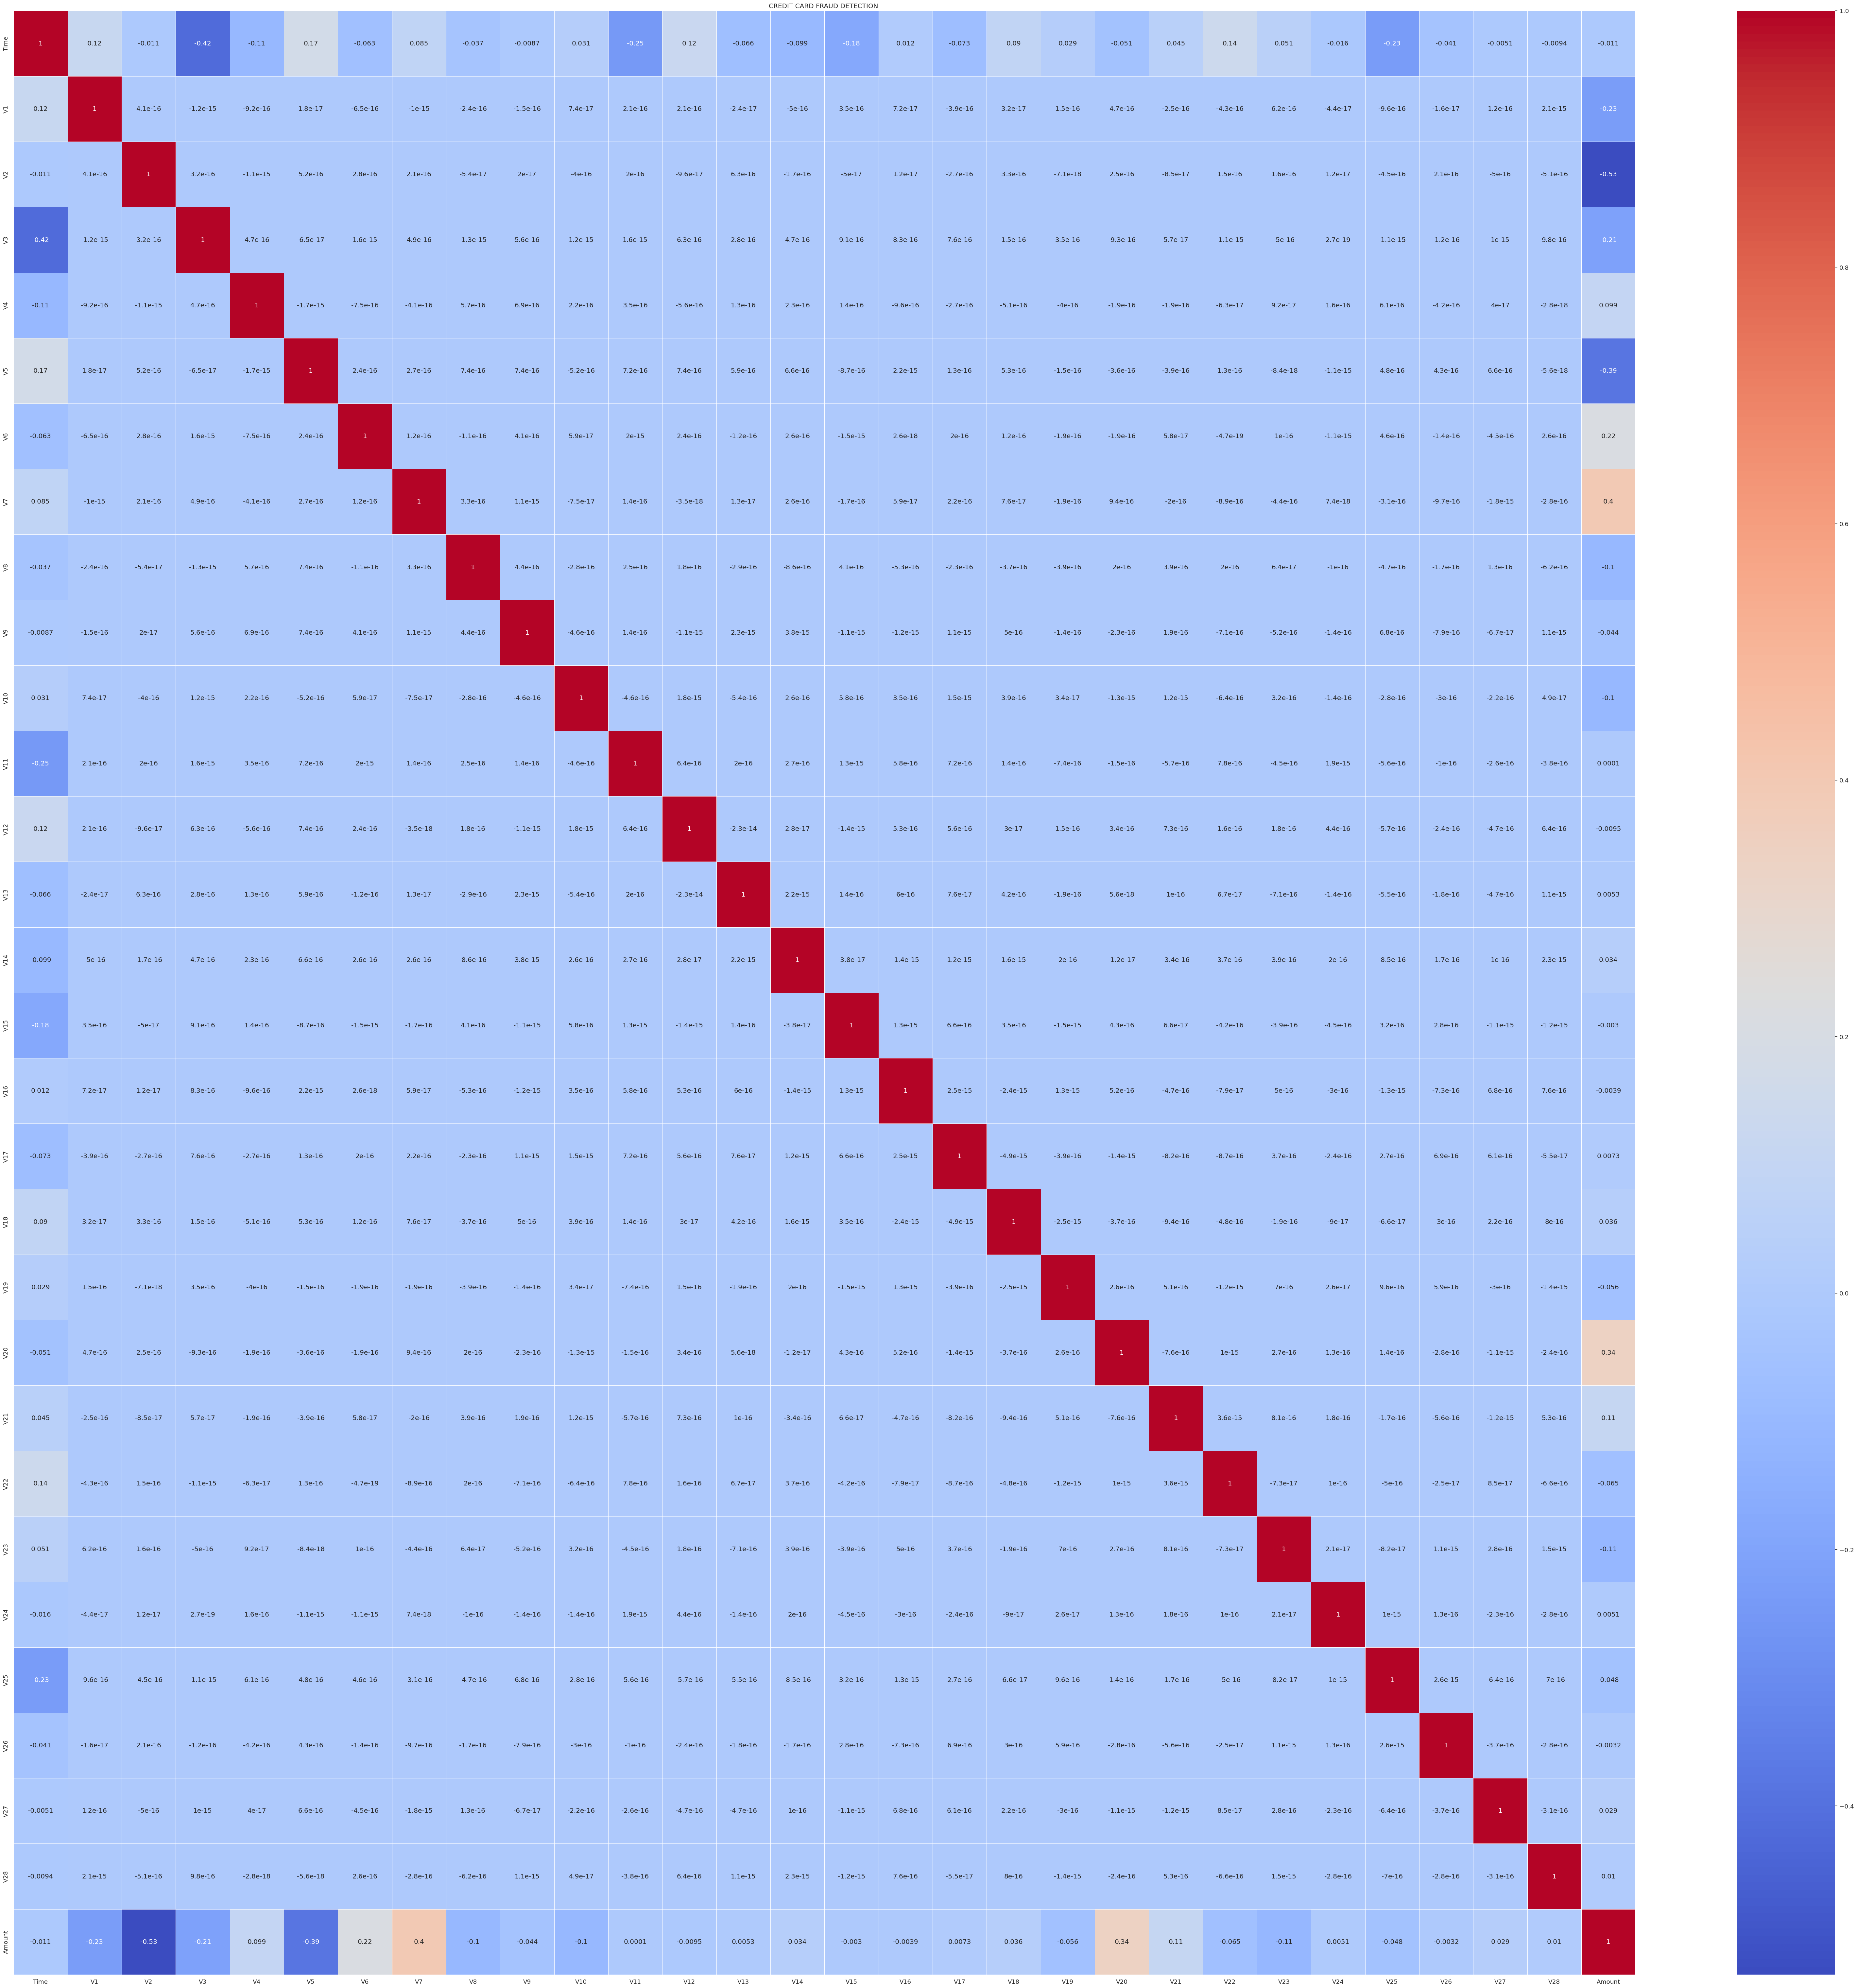

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV file
csv_file = '/content/drive/MyDrive/Credit-Card-Fraud-Detection Dataset/creditcard.csv'  # Replace with the actual path to your CSV file
data = pd.read_csv(csv_file)

label_column_name = 'Class'

# Remove the label column from the DataFrame
data = data.drop(columns=[label_column_name])


correlation_matrix = data.corr()

plt.figure(figsize=(80, 78))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('CREDIT CARD FRAUD DETECTION ')

plt.show()